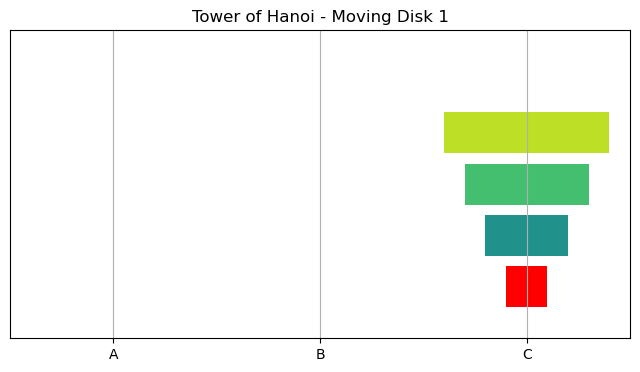

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

def draw_hanoi(pegs, num_disks, moving_disk=None, pause=0.8):
    fig, ax = plt.subplots(figsize=(8, 4))
    peg_positions = [1, 3, 5]
    disk_colors = plt.cm.viridis(np.linspace(0.3, 0.9, num_disks))

    for i, peg in enumerate(pegs):
        x = peg_positions[i]
        for j, disk in enumerate(reversed(peg)):
            y = j
            width = disk * 0.4
            color = 'red' if disk == moving_disk else disk_colors[disk - 1]
            ax.barh(y, width, left=x - width / 2, height=0.8, color=color)

    ax.set_xlim(0, 6)
    ax.set_ylim(-1, num_disks + 1)
    ax.set_xticks(peg_positions)
    ax.set_xticklabels(['A', 'B', 'C'])
    ax.set_yticks([])
    ax.set_title(f"Tower of Hanoi - Moving Disk {moving_disk if moving_disk else ''}")
    ax.grid(True, axis='x')
    plt.show()
    time.sleep(pause)
    clear_output(wait=True)

def hanoi_with_steps(n, source, target, auxiliary, pegs, moves):
    if n == 1:
        disk = pegs[source].pop()
        pegs[target].append(disk)
        moves.append(([[*peg] for peg in pegs], disk))
        return
    hanoi_with_steps(n-1, source, auxiliary, target, pegs, moves)
    hanoi_with_steps(1, source, target, auxiliary, pegs, moves)
    hanoi_with_steps(n-1, auxiliary, target, source, pegs, moves)

def solve_and_visualize_hanoi(num_disks=3):
    pegs = [list(reversed(range(1, num_disks + 1))), [], []]
    moves = [([list(p) for p in pegs], None)]
    hanoi_with_steps(num_disks, 0, 2, 1, pegs, moves)
    for state, moving_disk in moves:
        draw_hanoi(state, num_disks, moving_disk)

# Run for 4 disks
solve_and_visualize_hanoi(num_disks=4)
